In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#insert the absolute path to your data and models folder here
DATA_PATH= "/content/drive/MyDrive/FANIYAN PROJECT/CODE/Saved models and Pickles/"

In [7]:
import os 
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pickle
import matplotlib.pyplot as plt

In [10]:
keyword= "mask"
dirList= []
for root, dirs, files in os.walk(DATA_PATH+"test_100"):
  for file in files:
    if keyword in file:
      dir= os.path.join(root, file)
      dirList.append(dir)


In [12]:
imageDir= []
for maskDir in dirList:
  maskDir= maskDir.replace("_mask", "")
  imageDir.append(maskDir)

In [ ]:
masks= []
for dir in dirList:
  img= cv2.imread(dir, 0)
  masks.append(img)


In [ ]:
np.unique(masks)

In [ ]:
images[0].shape

In [ ]:
images= []
for imgDir in imageDir:
  imgDir= cv2.imread(imgDir, cv2.IMREAD_COLOR)
  imgDir = cv2.cvtColor(imgDir, cv2.COLOR_RGB2BGR)
  images.append(imgDir)




In [ ]:
size_width_height= 320
resizedImages= []
for img in images:
  img= cv2.resize(img, dsize=(size_width_height, size_width_height), interpolation= cv2.INTER_LINEAR)
  resizedImages.append(img)

In [ ]:
resizedMasks= []
for masks in masks:
  masks= cv2.resize(masks, dsize=(size_width_height, size_width_height), interpolation= cv2.INTER_LINEAR)
  resizedMasks.append(masks)

In [ ]:
del masks, images

In [ ]:
print(np.array(resizedImages).shape, np.array(resizedMasks).shape)


#a1= resizedImages
#b1= resizedMasks

(100, 320, 320, 3) (100, 320, 320)


Now for the Validation dataset

In [14]:
keyword= "mask"
dirList2= []
for root, dirs, files in os.walk(DATA_PATH+"validation_100"):
  for file in files:
    if keyword in file:
      dir= os.path.join(root, file)
      dirList2.append(dir)


In [15]:
imageDir2= []
for maskDir in dirList2:
  maskDir= maskDir.replace("_mask", "")
  imageDir2.append(maskDir)

In [ ]:
masks2= []
for dir in dirList2:
  img= cv2.imread(dir, 0)
  masks2.append(img)

In [ ]:
images2= []
for imgDir in imageDir2:
  imgDir= cv2.imread(imgDir, cv2.IMREAD_COLOR)
  imgDir = cv2.cvtColor(imgDir, cv2.COLOR_RGB2BGR)
  images2.append(imgDir)

In [ ]:
size_width_height= 320
resizedImages2= []
for img in images2:
  img= cv2.resize(img, dsize=(size_width_height, size_width_height), interpolation= cv2.INTER_LINEAR)
  resizedImages2.append(img)

In [ ]:
resizedMasks2= []
for masks in masks2:
  img= cv2.resize(masks, dsize=(size_width_height, size_width_height), interpolation= cv2.INTER_LINEAR)
  resizedMasks2.append(img)

In [ ]:
"""
pickle.dump(resizedImages2, open("/content/drive/MyDrive/Colab Notebooks/a2.pkl", "wb"))
pickle.dump(resizedMasks2, open("/content/drive/MyDrive/Colab Notebooks/b2.pkl", "wb"))
"""

Make one big dataset for image and mask

In [ ]:
IMAGES= resizedImages + resizedImages2
IMAGES= np.array(IMAGES)

In [ ]:
MASKS= resizedMasks + resizedMasks2
MASKS= np.array(MASKS)

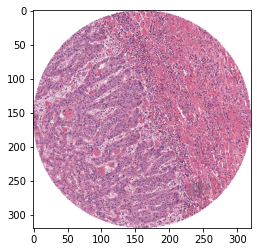

In [ ]:
plt.imshow(IMAGES[144])

Save files

In [ ]:
pickle.dump(IMAGES, open(DATA_PATH+"IMAGES.pkl", "wb"))

In [ ]:
#Conversion of mask to three labels
change= MASKS.tolist()

for i in range(200):
  for j in range(320):
    for k in range(320):
      if change[i][j][k]>= 0 and change[i][j][k]<= 50:
        change[i][j][k]= 0
      elif change[i][j][k]> 50 and change[i][j][k]<= 205:
        change[i][j][k]= 1
      elif change[i][j][k]> 205 and change[i][j][k]<= 255:
          change[i][j][k]= 2


pickle.dump(np.array(change), open(DATA_PATH+"MASKS.pkl", "wb"))

In [ ]:
print(np.unique(change), IMAGES.shape, MASKS.shape)

[0 1 2] (200, 320, 320, 3) (200, 320, 320)
